In [1]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#data preprocessing
fulfillment = pd.read_csv(r"C:\Users\sandh\Desktop\.vs\data\fulfillment.csv")
fulfillment.head()


,Product Name,Warehouse Order Fulfillment (days)
0,Perfect Fitness Perfect Rip Deck,8.3
1,Nike Men's Dri-FIT Victory Golf Polo,6.6
2,O'Brien Men's Neoprene Life Vest,5.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
4,Under Armour Girls' Toddler Spine Surge Runni,6.3


In [3]:
inventory = pd.read_csv(r"C:\Users\sandh\Desktop\.vs\data\inventory.csv")
inventory.head()

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648


In [4]:
orders = pd.read_csv(r"C:\Users\sandh\Desktop\.vs\data\orders_and_shipments.csv")
orders.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200


In [5]:
orders.shape

(30871, 24)

### DATA CLEANING

In [6]:
fulfillment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product Name                          118 non-null    object 
 1    Warehouse Order Fulfillment (days)   118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [7]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             4200 non-null   object 
 1    Year Month              4200 non-null   int64  
 2    Warehouse Inventory     4200 non-null   int64  
 3   Inventory Cost Per Unit  4200 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 131.4+ KB


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Order ID                     30871 non-null  int64 
 1    Order Item ID               30871 non-null  int64 
 2    Order YearMonth             30871 non-null  int64 
 3    Order Year                  30871 non-null  int64 
 4    Order Month                 30871 non-null  int64 
 5    Order Day                   30871 non-null  int64 
 6   Order Time                   30871 non-null  object
 7   Order Quantity               30871 non-null  int64 
 8   Product Department           30871 non-null  object
 9   Product Category             30871 non-null  object
 10  Product Name                 30871 non-null  object
 11   Customer ID                 30871 non-null  int64 
 12  Customer Market              30871 non-null  object
 13  Customer Region              30

In [9]:
# fixing the column name by trimming the white space in the beginning and the end
orders.columns = orders.columns.str.strip()
inventory.columns = inventory.columns.str.strip()
fulfillment.columns = fulfillment.columns.str.strip()

In [10]:
# drop unncessary columns
orders = orders.drop(['Order Item ID','Order Time'], axis=1, errors='ignore')
orders.columns

Index(['Order ID', 'Order YearMonth', 'Order Year', 'Order Month', 'Order Day',
       'Order Quantity', 'Product Department', 'Product Category',
       'Product Name', 'Customer ID', 'Customer Market', 'Customer Region',
       'Customer Country', 'Warehouse Country', 'Shipment Year',
       'Shipment Month', 'Shipment Day', 'Shipment Mode',
       'Shipment Days - Scheduled', 'Gross Sales', 'Discount %', 'Profit'],
      dtype='object')

In [11]:
#change the datatype of time feature columns
orders[['Order Year','Order Month','Order Day','Shipment Year','Shipment Month','Shipment Day']] = orders[['Order Year','Order Month','Order Day','Shipment Year','Shipment Month','Shipment Day']].astype(str)

In [12]:
# change the datatype of gross sales and profit columns
orders[['Gross Sales','Profit']]=orders[['Gross Sales','Profit']].astype(float)

In [13]:
# the column discount has string value changing it to float value..
# remove leading and trailing spaces from the 'discount %' columns
orders['Discount %'] = orders['Discount %'].str.strip()

# replace '-' with 0 in the 'Discount %' column
orders['Discount %'] = orders['Discount %'].replace('-', float('0'))

# change the datatype of 'Discount %' column to float
orders['Discount %'] = orders['Discount %'].astype(float)
orders['Discount %']

0        0.25
1        0.09
2        0.06
3        0.15
4        0.13
         ... 
30866    0.06
30867    0.12
30868    0.09
30869    0.02
30870    0.00
Name: Discount %, Length: 30871, dtype: float64

In [14]:
#The column Customer Country contains some special characters. For example, Peru has the special characters for letter "u". We will replace them
orders['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican�Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d�Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Per�', 'Algeria�', 'Ukraine', 'Belgium', 'Philippines',
       'Austria', 'Uruguay', 'Malaysia', 'Hong Kong', 'Saudi Arabia',
       'Switzerland', 'Ireland', 'Bulg

In [15]:
#replace the special characters in the Customer Country column
orders['Customer Country'] = orders['Customer Country'].replace({
    'Dominican�Republic': 'Dominican Republic',
    'Cote d�Ivoire': 'Cote d Ivoire', 
    'Per�': 'Peru',
    'Algeria�': 'Algeria',
    'Israel�':'Israel',
    'Ben�n': 'Benin'
})
orders['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Peru', 'Algeria', 'Ukraine', 'Belgium', 'Philippines',
       'Austria', 'Uruguay', 'Malaysia', 'Hong Kong', 'Saudi Arabia',
       'Switzerland', 'Ireland', 'Bulga

In [16]:
# checking for missing value
order_missing_count = orders.isna().sum()
print(order_missing_count)

Order ID                     0
Order YearMonth              0
Order Year                   0
Order Month                  0
Order Day                    0
Order Quantity               0
Product Department           0
Product Category             0
Product Name                 0
Customer ID                  0
Customer Market              0
Customer Region              0
Customer Country             0
Warehouse Country            0
Shipment Year                0
Shipment Month               0
Shipment Day                 0
Shipment Mode                0
Shipment Days - Scheduled    0
Gross Sales                  0
Discount %                   0
Profit                       0
dtype: int64


In [17]:
inventory_missing_count = inventory.isna().sum()
print(inventory_missing_count)

Product Name               0
Year Month                 0
Warehouse Inventory        0
Inventory Cost Per Unit    0
dtype: int64


In [18]:
fulfillment_missing_count = fulfillment.isna().sum()
print(fulfillment_missing_count)

Product Name                          0
Warehouse Order Fulfillment (days)    0
dtype: int64


In [19]:
# checking for dupliacates
duplicate_rows = orders[orders.duplicated()]

In [20]:
duplicate_rows = inventory[inventory.duplicated()]

In [21]:
duplicate_rows = fulfillment[fulfillment.duplicated()]

In [22]:
# Create a new DataFrame with isolated columns
product_info = orders[['Product Name', 'Product Category', 'Product Department']]
#Drop the duplicates to have the distinct product names
product = product_info.drop_duplicates()
product

,Product Name,Product Category,Product Department
0,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop
157,Pelican Sunstream 100 Kayak,Water Sports,Fan Shop
294,Diamondback Women's Serene Classic Comfort Bi,Camping & Hiking,Fan Shop
418,O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,Fan Shop
463,Team Golf Texas Longhorns Putter Grip,Accessories,Outdoors
...,...,...,...
15458,First aid kit,Health and Beauty,Health and Beauty
15464,Rock music,Music,Discs Shop
15621,Men's gala suit,Men's Clothing,Apparel
18869,Toys,Toys,Fan Shop


In [23]:
# export the product information to a new csv file
product.to_csv(r"C:\Users\sandh\Desktop\.vs\data\product.csv", index=False)

In [24]:
inventory


,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648
...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,201501,0,1.44662
4196,Ogio Race Golf Shoes,201501,0,0.10310
4197,GolfBuddy VT3 GPS Watch,201501,0,1.77747
4198,Titleist Small Wheeled Travel Cover,201501,0,0.15244


In [25]:
#In inventory table, we only have the storage cost for each product name. In order to know the average storage cost for each product category and product department, 
#we will merge the product table and the inventory table with the key = Product Name

inventory_merge = pd.merge(inventory, product, on='Product Name', how='left')
inventory_merge

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517,Cleats,Apparel
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291,Women's Apparel,Golf
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531,Indoor/Outdoor Games,Fan Shop
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321,Cardio Equipment,Footwear
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648,Shop By Sport,Golf
...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,201501,0,1.44662,Golf Gloves,Outdoors
4196,Ogio Race Golf Shoes,201501,0,0.10310,Golf Bags & Carts,Outdoors
4197,GolfBuddy VT3 GPS Watch,201501,0,1.77747,Kids' Golf Clubs,Outdoors
4198,Titleist Small Wheeled Travel Cover,201501,0,0.15244,Golf Gloves,Outdoors


In [26]:
#checking the missing value
missing_count = inventory_merge.isna().sum()
missing_count

Product Name                 0
Year Month                   0
Warehouse Inventory          0
Inventory Cost Per Unit      0
Product Category           175
Product Department         175
dtype: int64

In [27]:
null_records = inventory_merge[(inventory_merge['Product Category'].isna()) | (inventory_merge['Product Department'].isna())]
null_records

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
56,Dell Laptop,201712,14,1.56369,NaN,NaN
114,SOLE E35 Elliptical,201712,1,0.36106,NaN,NaN
115,Bushnell Pro X7 Jolt Slope Rangefinder,201712,9,2.22684,NaN,NaN
116,SOLE E25 Elliptical,201712,23,1.84297,NaN,NaN
117,Bowflex SelectTech 1090 Dumbbells,201712,36,1.49431,NaN,NaN
...,...,...,...,...,...,...
4068,Dell Laptop,201502,37,2.16324,NaN,NaN
4126,SOLE E35 Elliptical,201502,3,1.85317,NaN,NaN
4127,Bushnell Pro X7 Jolt Slope Rangefinder,201502,35,1.22691,NaN,NaN
4128,SOLE E25 Elliptical,201502,18,1.07032,NaN,NaN


In [28]:
null_records['Product Name'].unique()

array(['Dell Laptop', 'SOLE E35 Elliptical',
       'Bushnell Pro X7 Jolt Slope Rangefinder', 'SOLE E25 Elliptical',
       'Bowflex SelectTech 1090 Dumbbells'], dtype=object)

In [29]:
inventory_merge['Product Category'].fillna("None", inplace=True)
inventory_merge['Product Department'].fillna("None", inplace=True)
inventory_merge[inventory_merge['Product Department'].isna()]


,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department


feature creation



create datetime feature


In [30]:
from datetime import datetime
#Create orders date and shipment date features from the year, month, day column
orders['Order Date'] = orders['Order Year'].astype(str) + '/' + orders['Order Month'].astype(str) + '/' + orders['Order Day'].astype(str)
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
orders['Order Date'] = orders['Order Date'].dt.strftime('%Y/%m/%d')
orders['Order YearMonth'] = orders['Order YearMonth'].astype(str)

orders['Shipment Date'] = orders['Shipment Year'].astype(str) + '/' + orders['Shipment Month'].astype(str) + '/' + orders['Shipment Day'].astype(str)
orders['Shipment Date'] = pd.to_datetime(orders['Shipment Date'])
orders['Shipment Date'] = orders['Shipment Date'].dt.strftime('%Y-%m-%d')
orders['Shipment YearMonth'] = orders['Shipment Year'].astype(str) + '-' + orders['Shipment Month'].astype(str)


In [31]:
inventory_merge['Year Month']=pd.to_datetime(inventory_merge['Year Month'], format='%Y%m').dt.strftime('%Y/%m')
inventory_merge

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf
...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors


#Create shipment feature

In [32]:
# create shipping time feature
orders['Shipping Time'] = pd.to_datetime(orders['Shipment Date']) - pd.to_datetime(orders['Order Date'])
orders['Shipping Time'] = orders['Shipping Time'].dt.days

#Create delay shipment feature
def calculate_delay(row):
    if row['Shipping Time'] > row['Shipment Days - Scheduled']:
        return 'Late'
    else:
        return 'On time'

orders['Delay Shipment'] = orders.apply(calculate_delay, axis=1)
orders

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment
0,3535,201502,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,Standard Class,4,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late
1,4133,201503,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,Standard Class,4,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time
2,7396,201504,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,Standard Class,4,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time
3,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Standard Class,4,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time
4,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Standard Class,4,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,201712,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,Standard Class,4,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late
30867,7908,201504,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,Standard Class,4,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time
30868,29326,201603,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,Second Class,2,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time
30869,63308,201707,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,Second Class,2,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late


In [33]:
orders['Shipping Time'].describe()

count    30871.000000
mean         3.560753
std        131.195817
min       -975.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        978.000000
Name: Shipping Time, dtype: float64

Text(0.5, 1.0, 'Shipping Time')

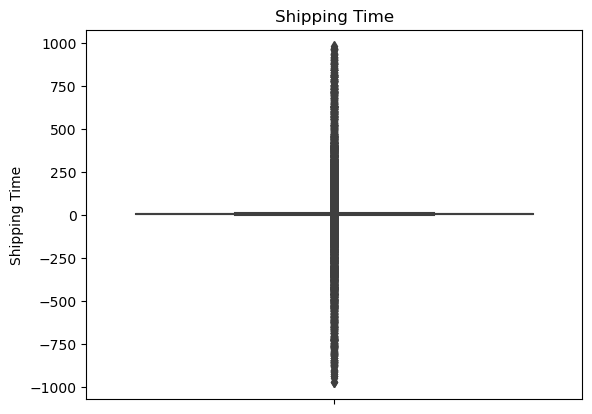

In [34]:
#Drawing a boxplot of Unit Price
sns.boxplot(y='Shipping Time', data=orders)
plt.title('Shipping Time')

In [35]:
#drp the abnormal shipping time
orders = orders[(orders['Shipping Time'] >=0) & (orders['Shipping Time'] <=28)]
orders

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment
0,3535,201502,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,Standard Class,4,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late
1,4133,201503,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,Standard Class,4,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time
2,7396,201504,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,Standard Class,4,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time
3,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Standard Class,4,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time
4,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Standard Class,4,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,201712,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,Standard Class,4,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late
30867,7908,201504,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,Standard Class,4,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time
30868,29326,201603,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,Second Class,2,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time
30869,63308,201707,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,Second Class,2,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late


create business performance feature

In [36]:
#create net sales and unit price feature
orders['Net Sales'] = orders['Gross Sales'] - orders['Gross Sales'] * orders['Discount %']
orders['Unit Price'] = orders['Gross Sales'] / orders['Order Quantity']
orders

C:\Users\sandh\AppData\Local\Temp\ipykernel_7292\1106848969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Net Sales'] = orders['Gross Sales'] - orders['Gross Sales'] * orders['Discount %']
C:\Users\sandh\AppData\Local\Temp\ipykernel_7292\1106848969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Unit Price'] = orders['Gross Sales'] / orders['Order Quantity']


,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
0,3535,201502,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late,300.00,400.0
1,4133,201503,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time,364.00,400.0
2,7396,201504,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time,376.00,400.0
3,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time,340.00,400.0
4,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time,348.00,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,201712,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late,11.28,12.0
30867,7908,201504,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time,26.40,30.0
30868,29326,201603,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time,27.30,30.0
30869,63308,201707,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late,147.00,150.0


In [37]:
#Create storage cost feature
inventory = inventory_merge  # Assign inventory_merge to inventory
inventory['Storage Cost'] = inventory['Inventory Cost Per Unit'] * inventory['Warehouse Inventory']
inventory


,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000
...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000


# EXPLORATORY DATA ANALYSIS
in EDA mainly focuses on analyzing the characteristics, behavouirs, patterns and trends based on these crierions: Business Performance, customer;Product; Inventory; Shipment


Business Performance

In [38]:
orders[['Order Quantity','Unit Price','Gross Sales','Net Sales','Discount %','Profit']].describe()

,Order Quantity,Unit Price,Gross Sales,Net Sales,Discount %,Profit
count,25861.000000,25861.000000,25861.000000,25861.000000,25861.000000,25861.000000
mean,2.097135,139.907506,198.150884,178.030088,0.101419,126.304513
std,1.451910,122.281886,111.770964,101.533400,0.070553,50.656121
min,1.000000,10.000000,10.000000,8.250000,0.000000,6.000000
25%,1.000000,50.000000,120.000000,105.600000,0.040000,97.000000
50%,1.000000,65.000000,200.000000,164.000000,0.090000,125.000000
75%,3.000000,200.000000,300.000000,245.000000,0.160000,147.000000
max,5.000000,533.000000,533.000000,533.000000,0.250000,258.000000


In [39]:
orders[orders['Unit Price']>400]

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
9387,71926,201711,2017,11,15,1,Outdoors,Garden,Lawn mower,15479,...,533.0,0.06,258.0,2017/11/15,2017-11-17,2017-11,2,On time,501.02,533.0
14936,69546,201710,2017,10,11,1,Technology,Cameras,Web Camera,13099,...,452.0,0.17,219.0,2017/10/11,2017-10-14,2017-10,3,On time,375.16,452.0
14937,69656,201710,2017,10,12,1,Technology,Cameras,Web Camera,13209,...,452.0,0.15,219.0,2017/10/12,2017-10-14,2017-10,2,On time,384.20,452.0
14938,69665,201710,2017,10,13,1,Technology,Cameras,Web Camera,13218,...,452.0,0.03,219.0,2017/10/13,2017-10-15,2017-10,2,Late,438.44,452.0
14939,69823,201710,2017,10,14,1,Technology,Cameras,Web Camera,13376,...,452.0,0.07,219.0,2017/10/14,2017-10-16,2017-10,2,On time,420.36,452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28877,75091,201712,2017,12,9,1,Outdoors,Garden,Lawn mower,18644,...,533.0,0.03,258.0,2017/12/09,2017-12-13,2017-12,4,Late,517.01,533.0
28910,71801,201711,2017,11,11,1,Outdoors,Garden,Lawn mower,15354,...,533.0,0.05,258.0,2017/11/11,2017-11-13,2017-11,2,Late,506.35,533.0
28911,71978,201711,2017,11,11,1,Outdoors,Garden,Lawn mower,15531,...,533.0,0.09,258.0,2017/11/11,2017-11-16,2017-11,5,Late,485.03,533.0
28912,71985,201711,2017,11,13,1,Outdoors,Garden,Lawn mower,15538,...,533.0,0.01,258.0,2017/11/13,2017-11-18,2017-11,5,Late,527.67,533.0


what are the total net Sales, profit and profit margin by the company?


In [40]:
#calculate total net sales, total profit, and profit Margin
total_net_sales = orders['Net Sales'].sum()
total_profit = orders['Profit'].sum()
profit_margin = (total_profit / total_net_sales)*100

print("Total Net Sales:", total_net_sales)
print("Total Profit:", total_profit)
print("profit Margin:", profit_margin, "%")

Total Net Sales: 4604036.11
Total Profit: 3266361.0
profit Margin: 70.94559907784911 %


what are the avg net sales and profit per month?


In [41]:
average_net_sales = total_net_sales/37
average_profit = total_profit/37

print("Average Net Sales:", average_net_sales)
print("Average Profit:", average_profit)

Average Net Sales: 124433.40837837839
Average Profit: 88280.02702702703


how do the net sales and profit change over time


C:\Users\sandh\AppData\Local\Temp\ipykernel_7292\4195562398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Shipment YearMonth'] = pd.to_datetime(orders['Shipment YearMonth'], format='%Y/%m')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:xlabel='Shipment YearMonth', ylabel='Profit Margin'>

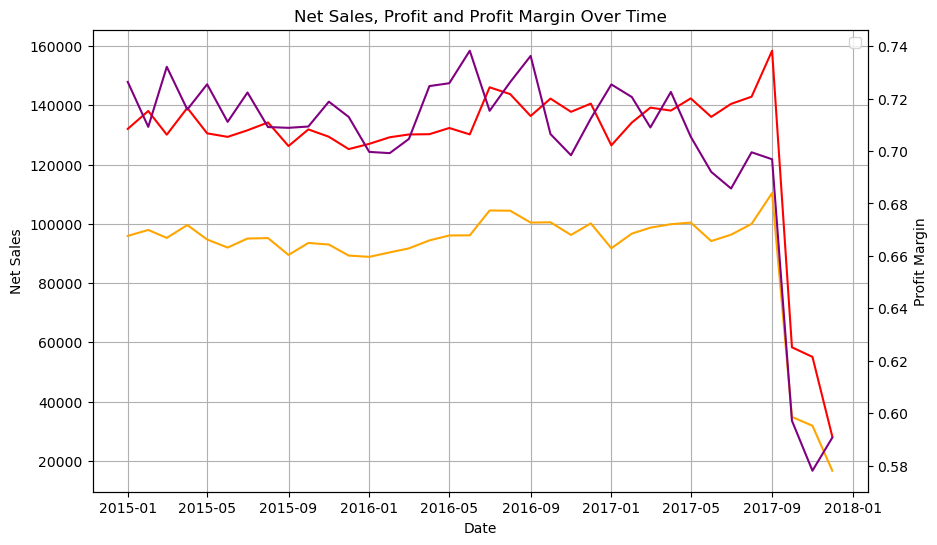

In [42]:
orders['Shipment YearMonth'] = pd.to_datetime(orders['Shipment YearMonth'], format='%Y/%m')

#Group data by year and month, and calculate the metrics
sales = orders.groupby(['Shipment YearMonth']).agg({'Net Sales':'sum','Profit':'sum'})
sales['Profit_margin'] = sales['Profit'] / sales['Net Sales']

#set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10,6))

#plottitng
sns.lineplot(x='Shipment YearMonth',y='Net Sales', data = sales, color='red')
sns.lineplot(x='Shipment YearMonth',y='Profit', data = sales, color='orange')
plt.xlabel('Date')
plt.title('Net Sales, Profit and Profit Margin Over Time')
plt.legend()
plt.grid(True)

#create a secondary y-axis
ax2 = plt.gca().twinx()
ax2.set_ylabel('Profit Margin')
sns.lineplot(x='Shipment YearMonth', y='Profit_margin', data=sales, color='purple', ax=ax2)


How do the number of orders change over time

C:\Users\sandh\AppData\Local\Temp\ipykernel_7292\2881588209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Order YearMonth'] = pd.to_datetime(orders['Order YearMonth'], format='%Y%m')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


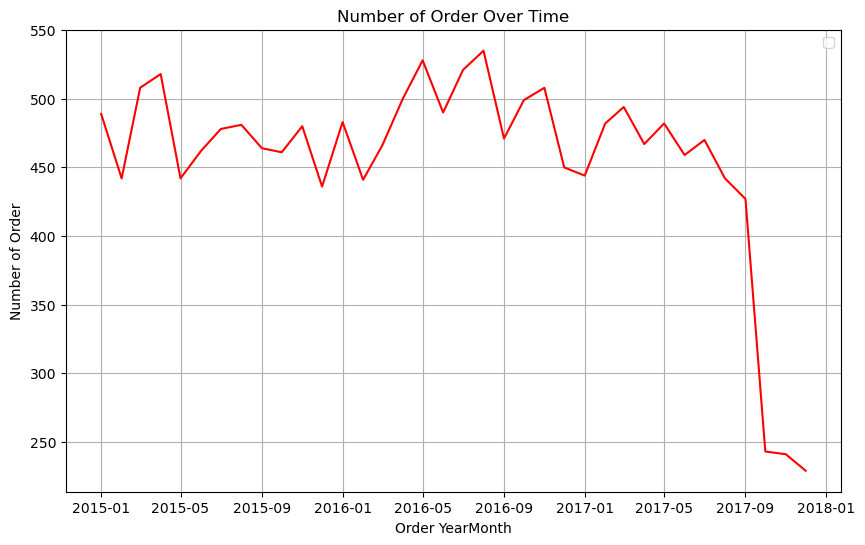

In [43]:
orders['Order YearMonth'] = pd.to_datetime(orders['Order YearMonth'], format='%Y%m')

#Group data by year and month, and calculate the metrics
demand = orders.groupby(['Order YearMonth'])['Order ID'].nunique().reset_index()
datetime #set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10,6))

#plotting
sns.lineplot(x='Order YearMonth', y='Order ID', data=demand, color='red')
plt.ylabel('Number of Order')
plt.title('Number of Order Over Time')
plt.legend()
plt.grid(True)

how do the avg order quantity and avg unit price change over time?

C:\Users\sandh\AppData\Local\Temp\ipykernel_7292\1004635471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Order YearMonth'] = pd.to_datetime(orders['Order YearMonth'], format='%Y/%m')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:xlabel='Order YearMonth', ylabel='Unit Price'>

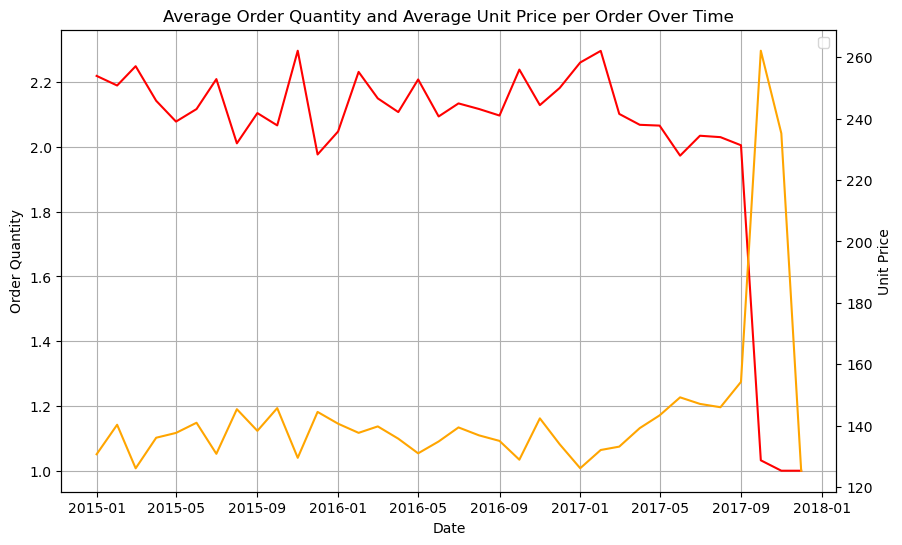

In [44]:
orders['Order YearMonth'] = pd.to_datetime(orders['Order YearMonth'], format='%Y/%m')

#group data by year and month, and calculate the metrics
demand = orders.groupby(['Order YearMonth']).agg({'Order Quantity':'mean','Unit Price':'mean'})

#setup the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))
#plotting
sns.lineplot(x='Order YearMonth', y='Order Quantity', data = demand, color='red')
plt.xlabel('Date')
plt.title('Average Order Quantity and Average Unit Price per Order Over Time')
plt.legend()
plt.grid(True)

#create a secondary y-axis
ax2 = plt.gca().twinx()
ax2.set_ylabel('Unit Price')
sns.lineplot(x='Order YearMonth', y='Unit Price', data = demand, color='orange')

which product departments account for the majority of net sales and number of orders?


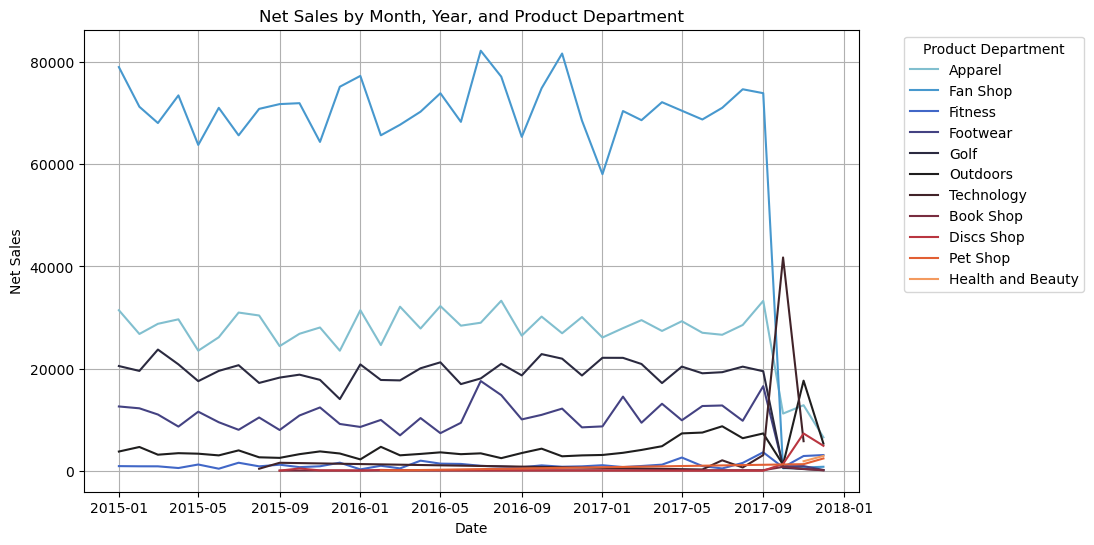

In [45]:
#Group data by year and month, and calculate the metrics
product_sales = orders.groupby(['Order YearMonth', 'Product Department'])['Net Sales'].sum().reset_index()

#set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#plotting 
sns.lineplot(x='Order YearMonth', y='Net Sales', data = product_sales, hue='Product Department', palette='icefire')

plt.xlabel('Date')
plt.title('Net Sales by Month, Year, and Product Department')
plt.legend(title = 'Product Department', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.show()

# Customer

How was the distribution of customers by country and market?

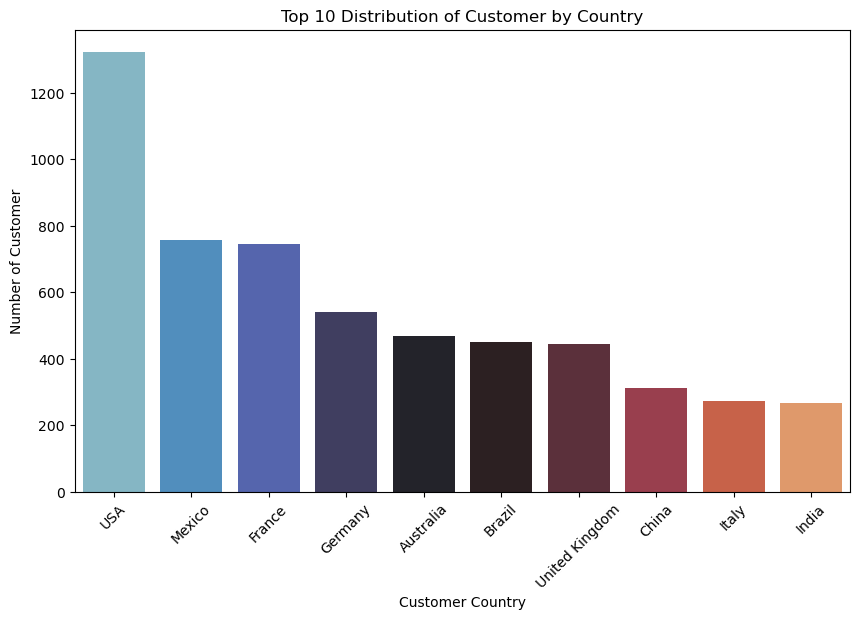

In [46]:
#group data by year and month and calculate the metrics
customer = orders.groupby(['Customer Country'])['Customer ID'].nunique().reset_index()
customer['Number of Customer'] = customer['Customer ID']
customer = customer.sort_values(by='Number of Customer', ascending=False).reset_index(drop=True)
top_10 = customer[['Customer Country','Number of Customer']].head(10)

#setup the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#plotting 
sns.barplot(data = top_10, x= 'Customer Country', y='Number of Customer', palette= 'icefire')
plt.title('Top 10 Distribution of Customer by Country')
plt.xticks(rotation = 45)
plt.show()

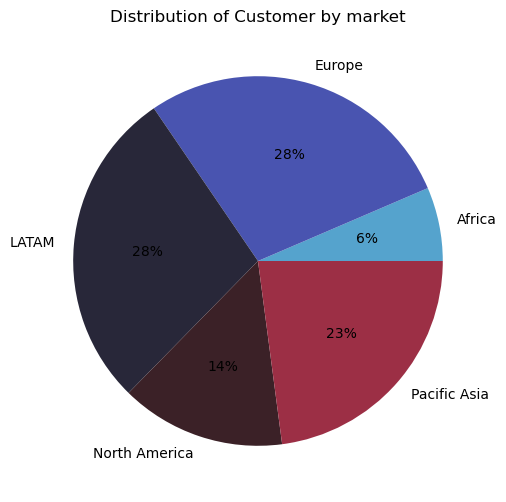

In [47]:
# group data by year and month, and calculate the metrics
customer = orders.groupby(['Customer Market'])['Customer ID'].nunique().reset_index()
customer['Number of Customer'] = customer['Customer ID']

#setup the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))
#plotting
data = customer['Number of Customer']
labels = customer['Customer Market']

#define seaborn color palette to use
colors = sns.color_palette('icefire')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Distribution of Customer by market')

plt.show()

how many customers does the company have over time?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


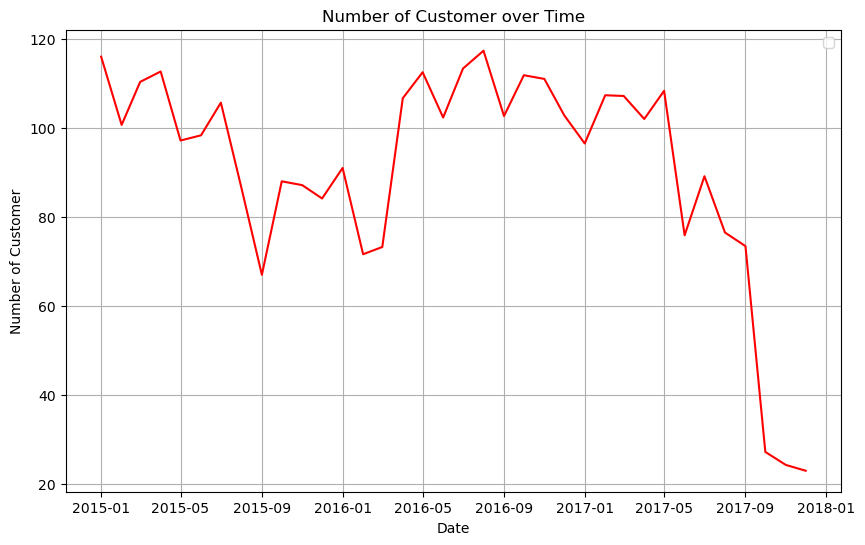

In [48]:
#group data by year and month, and calculate the metrics
customer = orders.groupby(['Order YearMonth','Product Department'])['Customer ID'].nunique().reset_index()
customer['Number of Customer'] = customer['Customer ID']

# setup the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#plotting
sns.lineplot(x='Order YearMonth', y ='Number of Customer', data = customer, color='red' , ci=None)
plt.xlabel('Date')
plt.title('Number of Customer over Time')
plt.legend()
plt.grid(True)

plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_7292\508824965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Order Month'] = orders['Order Month'].astype(int)


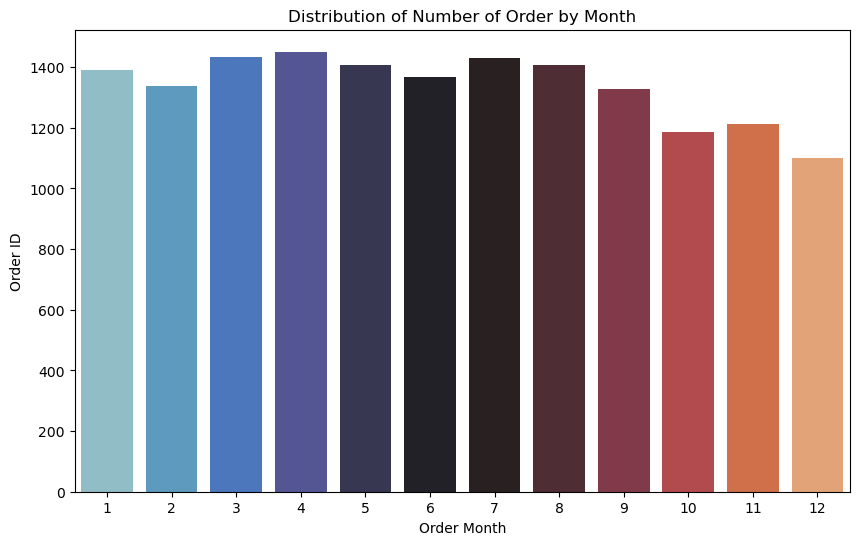

In [49]:
# group data by year and month, and calculate the metrics
orders['Order Month'] = orders['Order Month'].astype(int)
customer = orders.groupby(['Order Month'])['Order ID'].nunique().reset_index()
customer = customer.sort_values(by='Order Month', ascending = False)
#setup the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#plotting
sns.barplot(data = customer, x= 'Order Month', y='Order ID', palette= 'icefire')
plt.title('Distribution of Number of Order by Month')
plt.show()

# Product

Which product categories and product names are most preferred?


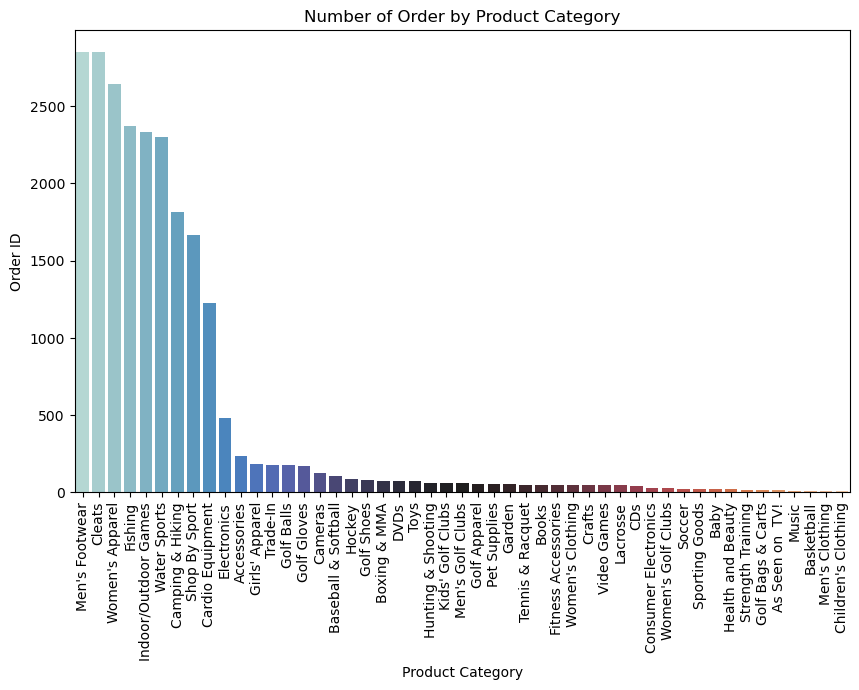

In [50]:
# group data by Order YearMonth and product Department, and calculate the metrics
prefer = orders.groupby(['Product Category'])['Order ID'].nunique().reset_index()
prefer = prefer.sort_values(by='Order ID', ascending= False)
#setup the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#plotting
sns.barplot(data=prefer, x='Product Category', y='Order ID', palette='icefire')
plt.title('Number of Order by Product Category')
plt.xticks(rotation = 90)
plt.show()

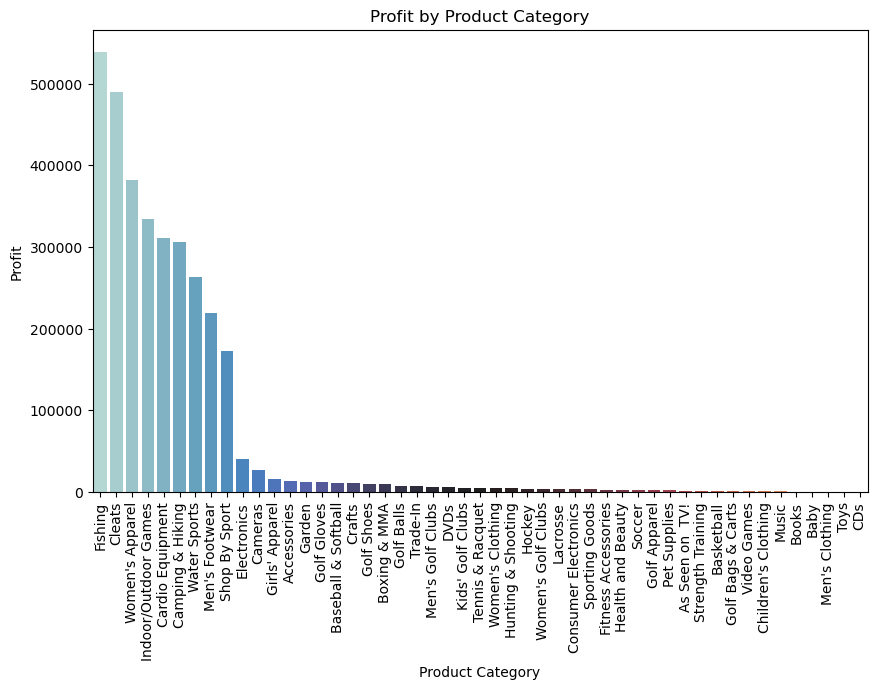

In [51]:

# Group data by Order YearMonth and Product Department, and calculate the metrics
prefer = orders.groupby(['Product Category'])['Profit'].sum().reset_index()
prefer = prefer.sort_values(by='Profit',ascending=False)
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=prefer, x='Product Category', y='Profit', palette='icefire')
plt.title('Profit by Product Category')
plt.xticks(rotation = 90)
plt.show()

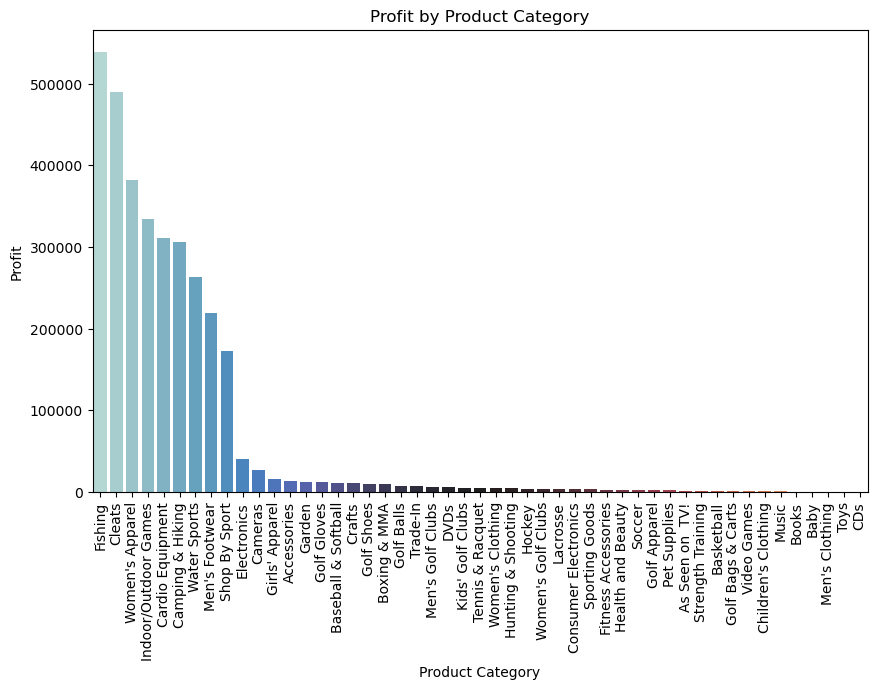

In [52]:

# Group data by Order YearMonth and Product Department, and calculate the metrics
prefer = orders.groupby(['Product Category'])['Profit'].sum().reset_index()
prefer = prefer.sort_values(by='Profit',ascending=False)
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=prefer, x='Product Category', y='Profit', palette='icefire')
plt.title('Profit by Product Category')
plt.xticks(rotation = 90)
plt.show()

# Inventory

In [53]:
inventory

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000
...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000


In [54]:
#overall descriptive analysis of the inventory management's key metrics
inventory[['Warehouse Inventory', 'Inventory Cost Per Unit', 'Storage Cost']].describe()

,Warehouse Inventory,Inventory Cost Per Unit,Storage Cost
count,4200.000000,4200.000000,4200.000000
mean,16.908095,1.236450,20.578791
std,71.121721,0.652183,100.453162
min,0.000000,0.102360,0.000000
25%,0.000000,0.672187,0.000000
50%,0.000000,1.262455,0.000000
75%,4.000000,1.800760,4.365012
max,931.000000,2.345030,1890.973240


Text(0.5, 1.0, 'Warehouse Inventory')

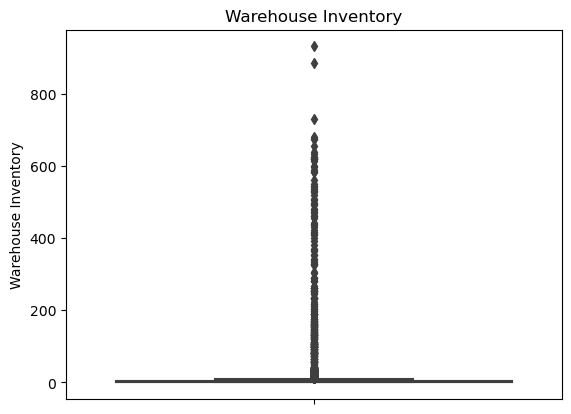

In [55]:
sns.boxplot(y='Warehouse Inventory', data=inventory)
plt.title('Warehouse Inventory')

In [56]:
inventory[inventory['Warehouse Inventory']>10]

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
56,Dell Laptop,2017/12,14,1.56369,None,None,21.89166
59,DVDs,2017/12,64,2.03553,DVDs,Discs Shop,130.27392
62,Summer dresses,2017/12,13,1.36250,Women's Clothing,Apparel,17.71250
65,Rock music,2017/12,16,2.26272,Music,Discs Shop,36.20352
68,Toys,2017/12,133,0.19512,Toys,Fan Shop,25.95096
...,...,...,...,...,...,...,...
4148,Glove It Women's Mod Oval 3-Zip Carry All Gol,2015/01,14,0.34936,Trade-In,Outdoors,4.89104
4150,Under Armour Women's Ignite Slide,2015/01,18,2.23827,Electronics,Footwear,40.28886
4155,Nike Women's Tempo Shorts,2015/01,43,2.30847,Cardio Equipment,Footwear,99.26421
4159,Hirzl Women's Hybrid Golf Glove,2015/01,13,1.34994,Golf Balls,Outdoors,17.54922


which product departments account for the majority of warehouse inventory and storage cost?

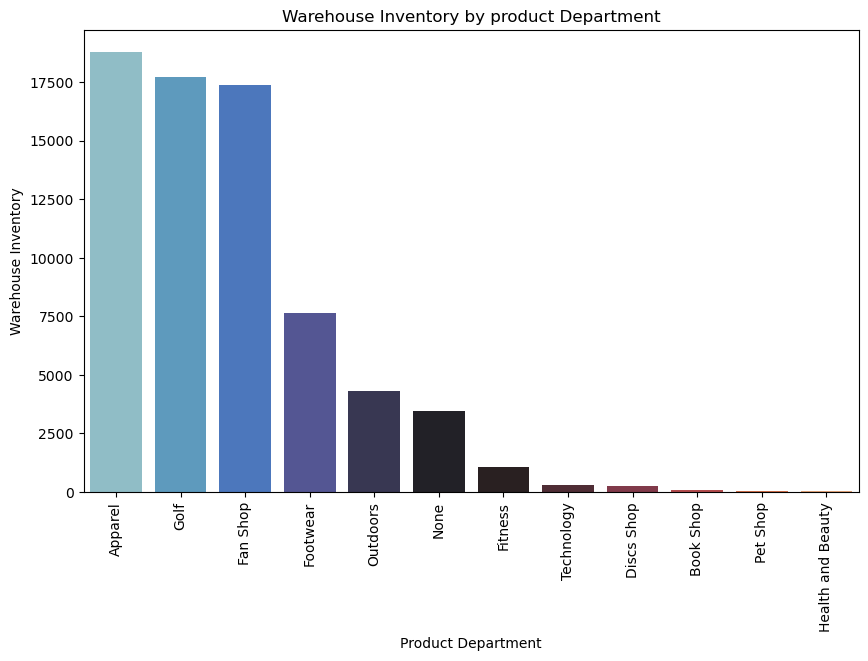

In [57]:
# Group data by order YearMonth and Product department, and calculate the metrics
ware = inventory.groupby(['Product Department'])['Warehouse Inventory'].sum().reset_index()
ware = ware.sort_values(by='Warehouse Inventory', ascending=False)

#setup the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#plotting
sns.barplot(data=ware, x='Product Department', y='Warehouse Inventory', palette='icefire')
plt.title('Warehouse Inventory by product Department')
plt.xticks(rotation = 90)
plt.show()

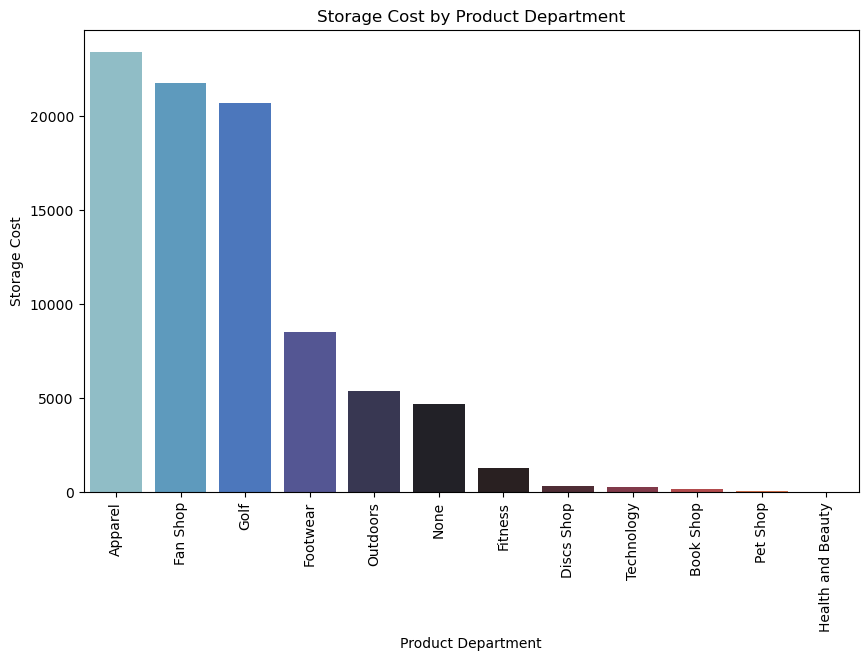

In [58]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
ware = inventory.groupby(['Product Department'])['Storage Cost'].sum().reset_index()
ware = ware.sort_values(by='Storage Cost',ascending=False)
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=ware, x='Product Department', y='Storage Cost', palette='icefire')
plt.title('Storage Cost by Product Department')
plt.xticks(rotation = 90)
plt.show()

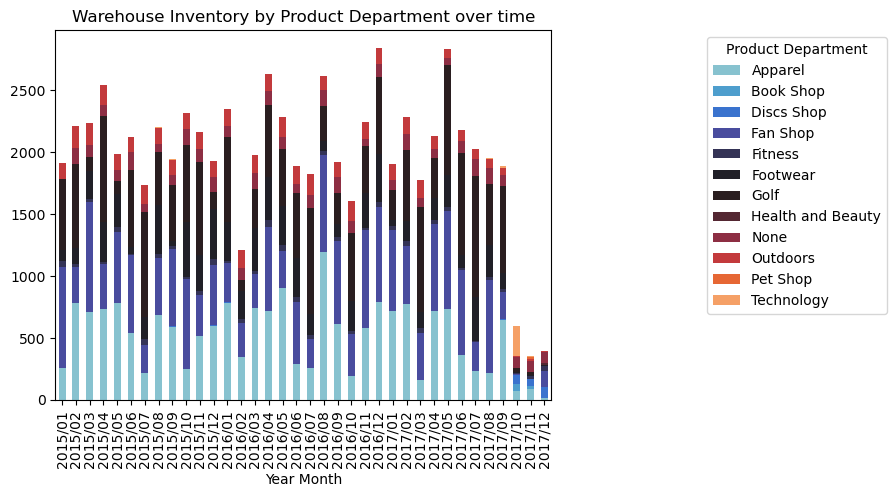

In [59]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
ware = inventory.groupby(['Year Month','Product Department']).agg({'Warehouse Inventory':'sum',
                                                                   'Storage Cost':'sum'})
ware = ware.sort_values(by='Year Month', ascending=True)

# Pivot the DataFrame
invent = ware.pivot_table(index='Year Month', columns='Product Department', values='Warehouse Inventory', aggfunc='first')

#Plotting
invent.plot(kind='bar', stacked=True, title='Warehouse Inventory by Product Department over time', color = sns.color_palette('icefire', n_colors =12))
plt.legend(title = 'Product Department', bbox_to_anchor=(1.3, 1), loc='upper left')
plt.show()

In [60]:
fulfillment.describe()

,Warehouse Order Fulfillment (days)
count,118.000000
mean,5.333898
std,2.414282
min,1.000000
25%,3.300000
50%,5.300000
75%,6.975000
max,9.900000


what is the avg of the avg fulfillment order

In [61]:
avg = fulfillment['Warehouse Order Fulfillment (days)'].mean()
avg

5.333898305084745

which product names have the highest and lowest avg order fulfillment?

In [62]:
#top 10 product names by average fulfillment order
fulfillment = fulfillment.sort_values(by='Warehouse Order Fulfillment (days)', ascending=False)
top10 = fulfillment.head(10)
top10

,Product Name,Warehouse Order Fulfillment (days)
38,Titleist Pro V1x Golf Balls,9.9
80,Nike Kids' Grade School KD VI Basketball Shoe,9.9
66,Elevation Training Mask 2.0,9.8
48,Bridgestone e6 Straight Distance NFL Tennesse,9.5
13,LIJA Women's Eyelet Sleeveless Golf Polo,9.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
65,Rock music,9.3
95,adidas Brazuca 2017 Official Match Ball,9.3
19,Columbia Men's PFG Anchor Tough T-Shirt,9.1
30,Team Golf Pittsburgh Steelers Putter Grip,9.1


In [63]:
#Top 10 product names has lowest avg order fulfillment
fulfillment = fulfillment.sort_values(by='Warehouse Order Fulfillment (days)',ascending=True)
top10 = fulfillment.head(10)
top10

,Product Name,Warehouse Order Fulfillment (days)
112,Diamondback Girls' Clarity 24 Hybrid Bike 201,1.0
39,adidas Men's Germany Black Crest Away Tee,1.0
107,Total Gym 1400,1.3
92,Mio ALPHA Heart Rate Monitor/Sport Watch,1.3
88,LIJA Women's Button Golf Dress,1.4
104,Polar Loop Activity Tracker,1.4
21,Team Golf Tennessee Volunteers Putter Grip,1.7
98,Nike Men's Kobe IX Elite Low Basketball Shoe,1.8
7,Pelican Sunstream 100 Kayak,1.8
114,SOLE E35 Elliptical,1.9


what average order fulfillment of each product departments?

In [64]:
#Merge table product and fulfillment
product_ful = pd.merge(fulfillment, product, on='Product Name')
product_ful

,Product Name,Warehouse Order Fulfillment (days),Product Category,Product Department
0,Diamondback Girls' Clarity 24 Hybrid Bike 201,1.0,Basketball,Fitness
1,adidas Men's Germany Black Crest Away Tee,1.0,Girls' Apparel,Golf
2,Total Gym 1400,1.3,Cleats,Apparel
3,Mio ALPHA Heart Rate Monitor/Sport Watch,1.3,Kids' Golf Clubs,Outdoors
4,LIJA Women's Button Golf Dress,1.4,Golf Shoes,Outdoors
...,...,...,...,...
108,LIJA Women's Eyelet Sleeveless Golf Polo,9.5,Golf Shoes,Outdoors
109,Bridgestone e6 Straight Distance NFL Tennesse,9.5,Electronics,Outdoors
110,Elevation Training Mask 2.0,9.8,Soccer,Fitness
111,Nike Kids' Grade School KD VI Basketball Shoe,9.9,Lacrosse,Fitness


In [65]:
#top 10 product names by avg fulfillment order
product_dep = product_ful.groupby(['Product Department'])['Warehouse Order Fulfillment (days)'].mean()
product_dep = product_dep.sort_values(ascending=False)
product_dep

Product Department
Discs Shop           7.050000
Pet Shop             6.900000
Apparel              5.962500
Fitness              5.950000
Golf                 5.562500
Outdoors             5.515385
Book Shop            5.200000
Footwear             4.876923
Technology           4.400000
Fan Shop             3.955556
Health and Beauty    2.300000
Name: Warehouse Order Fulfillment (days), dtype: float64

# Shipment

In [66]:
orders

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
0,3535,2015-02-01,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-02-01,6,Late,300.00,400.0
1,4133,2015-03-01,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-03-01,4,On time,364.00,400.0
2,7396,2015-04-01,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-04-01,2,On time,376.00,400.0
3,11026,2015-06-01,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-06-01,2,On time,340.00,400.0
4,11026,2015-06-01,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-06-01,2,On time,348.00,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,2017-12-01,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12-01,6,Late,11.28,12.0
30867,7908,2015-04-01,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-04-01,4,On time,26.40,30.0
30868,29326,2016-03-01,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-03-01,2,On time,27.30,30.0
30869,63308,2017-07-01,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-07-01,4,Late,147.00,150.0


which warehouses are orders shipped from?

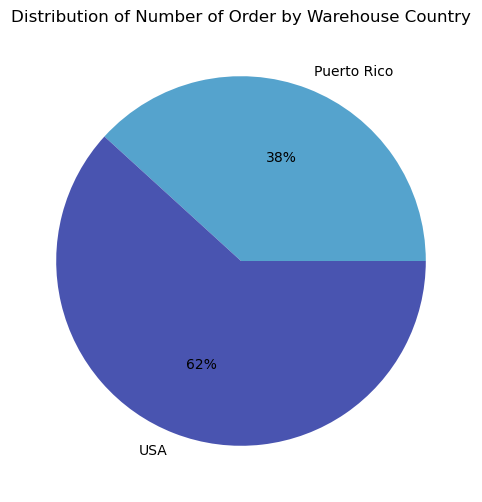

In [67]:
# Group data by year and month, and calculate th emetrics
house = orders.groupby(['Warehouse Country'])['Order ID'].nunique().reset_index()

#set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#plotting
data = house['Order ID']
labels = house['Warehouse Country']

#define Seaborn color palette to use
colors = sns.color_palette('icefire')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Distribution of Number of Order by Warehouse Country')

plt.show()

Which shipments made are preferred by customers?


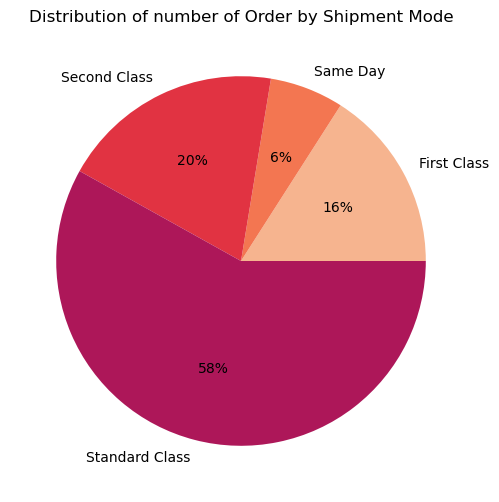

In [68]:
# Group data by year and month, and calculate the metrics?
mode = orders.groupby(['Shipment Mode'])['Order ID'].nunique().reset_index()

#setup the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#plotting
data = mode['Order ID']
labels = mode['Shipment Mode']

#define Seaborn color palette to use
colors = sns.color_palette('rocket_r')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Distribution of number of Order by Shipment Mode')

plt.show()

what is the shipping time for each shipment mode

In [69]:
# group data and calculate the metrics
time = orders.groupby(['Shipping Time','Shipment Mode']).agg({'Order ID':'nunique'})
time = time.sort_values(by='Shipping Time', ascending=True)

#pivot the Dataframe
time = time.pivot_table(index='Shipping Time', columns='Shipment Mode', values='Order ID', aggfunc='first')
time

Shipment Mode,First Class,Same Day,Second Class,Standard Class
Shipping Time,,,,
0,48.0,310.0,72.0,161.0
1,55.0,269.0,61.0,139.0
2,1484.0,139.0,940.0,2890.0
3,163.0,73.0,241.0,851.0
4,144.0,80.0,825.0,2507.0
5,175.0,92.0,221.0,824.0
6,160.0,76.0,535.0,1665.0
7,4.0,3.0,10.0,13.0
8,4.0,3.0,6.0,15.0


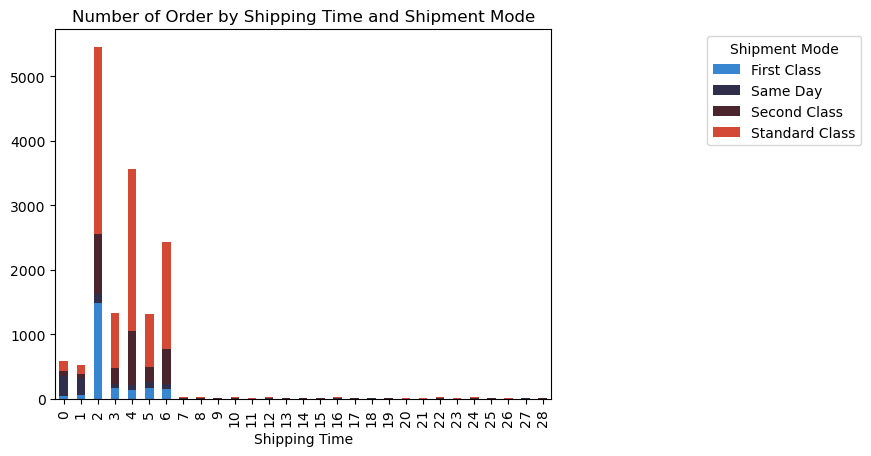

In [70]:
#plotting
time.plot(kind='bar', stacked=True, title='Number of Order by Shipping Time and Shipment Mode', color = sns.color_palette('icefire', n_colors = 4))
plt.legend(title = 'Shipment Mode', bbox_to_anchor=(1.3, 1), loc='upper left')
plt.show()

what is the late shipment rate by product department and market?

In [71]:
# Calculate the number of late orders and total orders per Product Department
late = orders[orders['Delay Shipment'] == 'Late'].groupby('Product Department').size().reset_index(name='Late Orders')
total = orders.groupby('Product Department').size().reset_index(name='Total Orders')
late_order = pd.merge(late, total, on='Product Department')

#Calculate late shipment rate by product department
late_order['Late Shipment Rate'] = late_order['Late Orders']/late_order['Total Orders']
late_order

,Product Department,Late Orders,Total Orders,Late Shipment Rate
0,Apparel,3017,6828,0.441857
1,Book Shop,20,48,0.416667
2,Discs Shop,67,167,0.401198
3,Fan Shop,4302,10168,0.423092
4,Fitness,132,338,0.390533
5,Footwear,712,1653,0.430732
6,Golf,2205,5041,0.437413
7,Health and Beauty,6,18,0.333333
8,Outdoors,605,1399,0.432452
9,Pet Shop,24,51,0.470588


In [72]:
# calculate the number of late orders and total orders per product department
late = orders[orders['Delay Shipment'] == 'Late'].groupby('Customer Market').size().reset_index(name='Late Orders')
total = orders.groupby('Customer Market').size().reset_index(name='Total Orders')
late_order = pd.merge(late, total, on='Customer Market')

#calculate late shipmwnt rate by product department
late_order['Late Shipment rate'] = late_order['Late Orders']/late_order['Total Orders']
late_order

,Customer Market,Late Orders,Total Orders,Late Shipment rate
0,Africa,640,1661,0.385310
1,Europe,3145,7171,0.438572
2,LATAM,3357,7788,0.431048
3,North America,1708,3873,0.441002
4,Pacific Asia,2317,5368,0.431632


how the late shipment rate fluctutate over time?

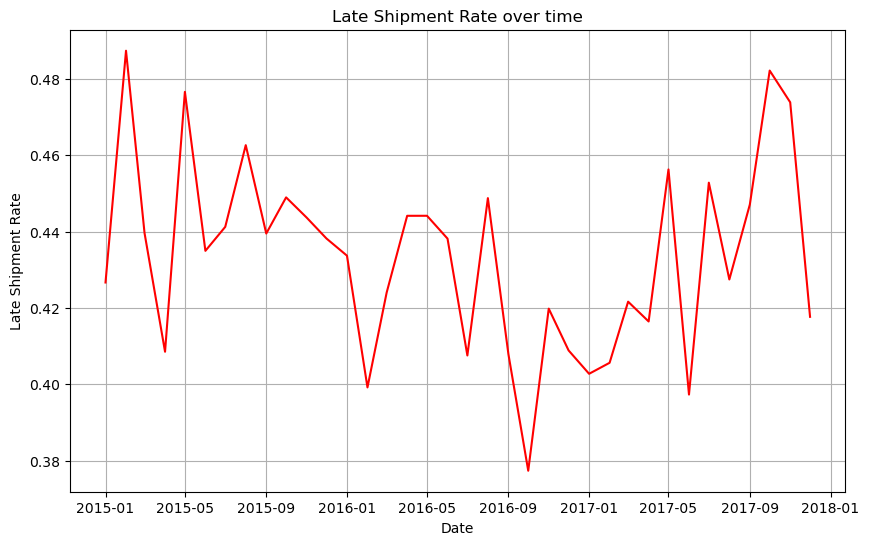

In [73]:
# Calculate the number of late orders and total orders per Product Department
late = orders[orders['Delay Shipment'] == 'Late'].groupby('Shipment YearMonth').size().reset_index(name='Late Orders')
total = orders.groupby('Shipment YearMonth').size().reset_index(name='Total Orders')
late_order = pd.merge(late, total, on='Shipment YearMonth')

#Calculate late shipment rate by product department
late_order['Late Shipment Rate'] = late_order['Late Orders']/late_order['Total Orders']

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#Plotting
sns.lineplot(x='Shipment YearMonth',y = 'Late Shipment Rate', data = late_order, color ='red')

plt.xlabel('Date')
plt.title('Late Shipment Rate over time')
plt.grid(True)

plt.show()

# V.INVENTORY SEGMENTATION

In [74]:
product

,Product Name,Product Category,Product Department
0,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop
157,Pelican Sunstream 100 Kayak,Water Sports,Fan Shop
294,Diamondback Women's Serene Classic Comfort Bi,Camping & Hiking,Fan Shop
418,O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,Fan Shop
463,Team Golf Texas Longhorns Putter Grip,Accessories,Outdoors
...,...,...,...
15458,First aid kit,Health and Beauty,Health and Beauty
15464,Rock music,Music,Discs Shop
15621,Men's gala suit,Men's Clothing,Apparel
18869,Toys,Toys,Fan Shop


In [75]:
inventory

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000
...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000


In [76]:
#isolate product name from inventory warehouse
product_ware = inventory[['Product Name','Product Category', 'Product Department']]

#drop the duplicates to have the distinct product names
product_ware = product_ware.drop_duplicates()
product_ware

,Product Name,Product Category,Product Department
0,Perfect Fitness Perfect Rip Deck,Cleats,Apparel
1,Nike Men's Dri-FIT Victory Golf Polo,Women's Apparel,Golf
2,O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,Fan Shop
3,Nike Men's Free 5.0+ Running Shoe,Cardio Equipment,Footwear
4,Under Armour Girls' Toddler Spine Surge Runni,Shop By Sport,Golf
...,...,...,...
113,Stiga Master Series ST3100 Competition Indoor,Hockey,Fitness
114,SOLE E35 Elliptical,None,None
115,Bushnell Pro X7 Jolt Slope Rangefinder,None,None
116,SOLE E25 Elliptical,None,None


In [77]:
#using product isolation and add net sales from order table to segmentation
product_segment = orders.groupby(['Product Department', 'Product Category', 'Product Name'])['Net Sales'].sum().reset_index()
product_segment

,Product Department,Product Category,Product Name,Net Sales
0,Apparel,Baby,Baby sweater,1090.91
1,Apparel,Children's Clothing,Children's heaters,1527.96
2,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,540865.20
3,Apparel,Cleats,Total Gym 1400,1590.00
4,Apparel,Crafts,Porcelain crafts,19348.17
...,...,...,...,...
108,Outdoors,Women's Golf Clubs,MDGolf Pittsburgh Penguins Putter,1428.80
109,Outdoors,Women's Golf Clubs,TaylorMade White Smoke IN-12 Putter,2804.00
110,Pet Shop,Pet Supplies,Adult dog supplies,3866.52
111,Technology,Cameras,Web Camera,49046.52


In [78]:
#calculate share of net sales
product_segment['percent'] = product_segment['Net Sales']/total_net_sales

#calculate cumulative share of net sales
product_segment = product_segment.sort_values(by='percent', ascending = False)
product_segment['Cumulative'] = product_segment['percent'].cumsum()

#ABC Segmentation
product_segment['ABC Category'] = np.where(product_segment['Cumulative'] < 0.8, 'A [High value]',
                                          np.where((product_segment['Cumulative'] >= 0.8) & (product_segment['Cumulative'] <  0.95), 'B[Medium value]',
                                                   'C [Low value]'))
product_segment

,Product Department,Product Category,Product Name,Net Sales,percent,Cumulative,ABC Category
14,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,965748.00,0.209761,0.209761,A [High value]
13,Fan Shop,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,551430.00,0.119771,0.329532,A [High value]
2,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,540865.20,0.117476,0.447008,A [High value]
21,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,470448.00,0.102182,0.549190,A [High value]
56,Golf,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,418185.50,0.090830,0.640020,A [High value]
...,...,...,...,...,...,...,...
19,Fan Shop,Toys,Toys,782.76,0.000170,0.999470,C [Low value]
25,Fitness,Basketball,Diamondback Boys' Insight 24 Performance Hybr,741.00,0.000161,0.999631,C [Low value]
93,Outdoors,Kids' Golf Clubs,Garmin Approach S4 Golf GPS Watch,702.00,0.000152,0.999783,C [Low value]
72,Outdoors,Golf Apparel,Cleveland Golf Women's 588 RTX CB Satin Chrom,579.60,0.000126,0.999909,C [Low value]


In [79]:
#calculate coeffcient of variation by product name
CV = orders.groupby('Product Name')['Net Sales'].apply(lambda x: x.std() / x.mean()).reset_index()
CV.rename(columns={'Net Sales': 'CV'}, inplace=True)

#add cv column to product_segment
product_segment = pd.merge(product_segment, CV, on='Product Name')
product_segment

#XYZ segmentation
product_segment['XYZ Category'] = np.where(product_segment['CV'] < 0.25, 'X [Regular demand]',
                                          np.where((product_segment['CV'] >=0.25) & (product_segment['CV'] <=0.5), 'Y [Variable demand]',
                                                  'z [Irregular demand]'))
product_segment

,Product Department,Product Category,Product Name,Net Sales,percent,Cumulative,ABC Category,CV,XYZ Category
0,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,965748.00,0.209761,0.209761,A [High value],0.077699,X [Regular demand]
1,Fan Shop,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,551430.00,0.119771,0.329532,A [High value],0.078438,X [Regular demand]
2,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,540865.20,0.117476,0.447008,A [High value],0.495370,Y [Variable demand]
3,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,470448.00,0.102182,0.549190,A [High value],0.078101,X [Regular demand]
4,Golf,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,418185.50,0.090830,0.640020,A [High value],0.476291,Y [Variable demand]
...,...,...,...,...,...,...,...,...,...
108,Fan Shop,Toys,Toys,782.76,0.000170,0.999470,C [Low value],0.080233,X [Regular demand]
109,Fitness,Basketball,Diamondback Boys' Insight 24 Performance Hybr,741.00,0.000161,0.999631,C [Low value],0.078086,X [Regular demand]
110,Outdoors,Kids' Golf Clubs,Garmin Approach S4 Golf GPS Watch,702.00,0.000152,0.999783,C [Low value],0.066617,X [Regular demand]
111,Outdoors,Golf Apparel,Cleveland Golf Women's 588 RTX CB Satin Chrom,579.60,0.000126,0.999909,C [Low value],0.041148,X [Regular demand]


In [80]:
#ABC XYZ Segmentation
product_segment['ABCXYZ'] = product_segment['XYZ Category'].str[0] + product_segment['ABC Category'].str[0]
product_segment

,Product Department,Product Category,Product Name,Net Sales,percent,Cumulative,ABC Category,CV,XYZ Category,ABCXYZ
0,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,965748.00,0.209761,0.209761,A [High value],0.077699,X [Regular demand],XA
1,Fan Shop,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,551430.00,0.119771,0.329532,A [High value],0.078438,X [Regular demand],XA
2,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,540865.20,0.117476,0.447008,A [High value],0.495370,Y [Variable demand],YA
3,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,470448.00,0.102182,0.549190,A [High value],0.078101,X [Regular demand],XA
4,Golf,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,418185.50,0.090830,0.640020,A [High value],0.476291,Y [Variable demand],YA
...,...,...,...,...,...,...,...,...,...,...
108,Fan Shop,Toys,Toys,782.76,0.000170,0.999470,C [Low value],0.080233,X [Regular demand],XC
109,Fitness,Basketball,Diamondback Boys' Insight 24 Performance Hybr,741.00,0.000161,0.999631,C [Low value],0.078086,X [Regular demand],XC
110,Outdoors,Kids' Golf Clubs,Garmin Approach S4 Golf GPS Watch,702.00,0.000152,0.999783,C [Low value],0.066617,X [Regular demand],XC
111,Outdoors,Golf Apparel,Cleveland Golf Women's 588 RTX CB Satin Chrom,579.60,0.000126,0.999909,C [Low value],0.041148,X [Regular demand],XC


In [81]:
#count the product name of each segmentation
count = product_segment.groupby(['ABCXYZ'])['ABCXYZ'].count()
print(count, 'Result of segmentation')

ABCXYZ
XA     4
XB     6
XC    40
YA     2
YB     7
YC    28
zB     1
zC    25
Name: ABCXYZ, dtype: int64 Result of segmentation


In [82]:
#Segmentation by Product Department
depart = product_segment.groupby(['ABCXYZ','Product Department'])['Product Name'].count().reset_index()
depart

# Pivot the DataFrame
depart = depart.pivot_table(index='ABCXYZ', columns='Product Department', values='Product Name', aggfunc='first')
depart

Product Department,Apparel,Book Shop,Discs Shop,Fan Shop,Fitness,Footwear,Golf,Health and Beauty,Outdoors,Pet Shop,Technology
ABCXYZ,,,,,,,,,,,
XA,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XB,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0
XC,4.0,1.0,3.0,3.0,5.0,2.0,1.0,1.0,18.0,1.0,1.0
YA,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
YB,NaN,NaN,NaN,1.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN
YC,NaN,NaN,NaN,1.0,4.0,3.0,2.0,NaN,18.0,NaN,NaN
zB,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
zC,NaN,NaN,NaN,1.0,3.0,6.0,2.0,NaN,13.0,NaN,NaN


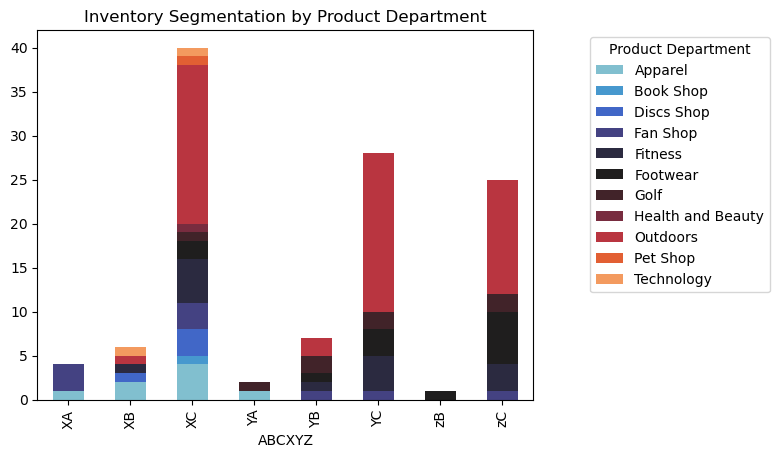

In [83]:
#plotting
depart.plot(kind='bar', stacked=True, title='Inventory Segmentation by Product Department', color = sns.color_palette('icefire', n_colors =11))
plt.legend(title = 'Product Department', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

# Exploratory analysis 2

first, let's add the segmentation into the order, inventory and fulfillment table

In [84]:
#Add segmentation into order table
iso = product_segment[['Product Name', 'ABCXYZ']]
order_segment = pd.merge(orders, iso, on = 'Product Name', how = 'left')
order_segment

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price,ABCXYZ
0,3535,2015-02-01,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,0.25,200.0,2015/02/21,2015-02-27,2015-02-01,6,Late,300.00,400.0,XA
1,4133,2015-03-01,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,0.09,200.0,2015/03/02,2015-03-06,2015-03-01,4,On time,364.00,400.0,XA
2,7396,2015-04-01,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,0.06,200.0,2015/04/18,2015-04-20,2015-04-01,2,On time,376.00,400.0,XA
3,11026,2015-06-01,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,0.15,200.0,2015/06/10,2015-06-12,2015-06-01,2,On time,340.00,400.0,XA
4,11026,2015-06-01,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,0.13,200.0,2015/06/10,2015-06-12,2015-06-01,2,On time,348.00,400.0,XA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25856,73246,2017-12-01,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,0.06,6.0,2017/12/05,2017-12-11,2017-12-01,6,Late,11.28,12.0,XC
25857,7908,2015-04-01,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,0.12,68.0,2015/04/26,2015-04-30,2015-04-01,4,On time,26.40,30.0,zC
25858,29326,2016-03-01,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,0.09,68.0,2016/03/04,2016-03-06,2016-03-01,2,On time,27.30,30.0,zC
25859,63308,2017-07-01,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,0.02,60.0,2017/07/13,2017-07-17,2017-07-01,4,Late,147.00,150.0,XC


In [85]:
#Add segmentation to inventory table
inventory_segment = pd.merge(inventory, iso, on = 'Product Name', how = 'left')
inventory_segment

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost,ABCXYZ
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000,YA
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582,YA
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000,YB
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321,zB
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000,YB
...,...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000,XC
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000,XC
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000,XC
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000,XC


In [86]:
#Add segmentation to inventory table
fulfillment_segment = pd.merge(fulfillment, iso, on = 'Product Name', how = 'left')
fulfillment_segment

,Product Name,Warehouse Order Fulfillment (days),ABCXYZ
0,Diamondback Girls' Clarity 24 Hybrid Bike 201,1.0,XC
1,adidas Men's Germany Black Crest Away Tee,1.0,zC
2,Total Gym 1400,1.3,XC
3,Mio ALPHA Heart Rate Monitor/Sport Watch,1.3,XC
4,LIJA Women's Button Golf Dress,1.4,XC
...,...,...,...
113,LIJA Women's Eyelet Sleeveless Golf Polo,9.5,YB
114,Bridgestone e6 Straight Distance NFL Tennesse,9.5,zC
115,Elevation Training Mask 2.0,9.8,YC
116,Nike Kids' Grade School KD VI Basketball Shoe,9.9,YC


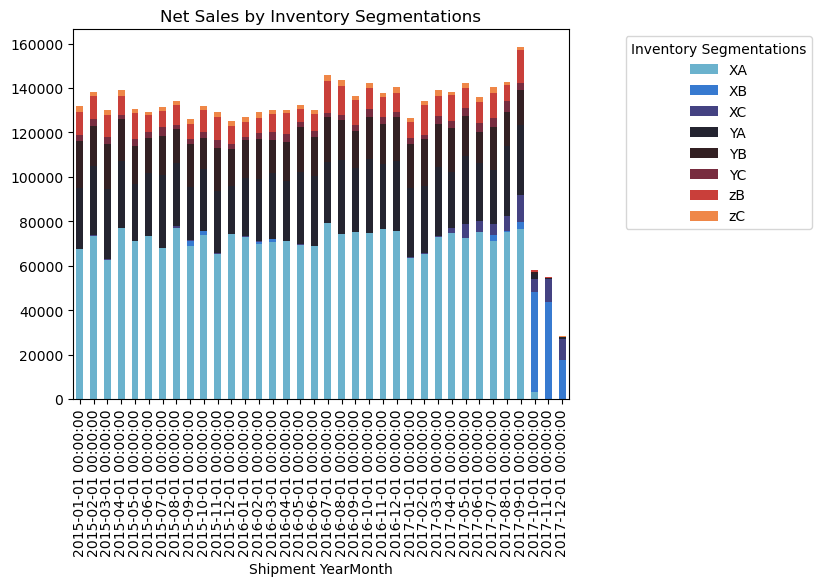

In [87]:
order_segment['Shipment YearMonth'] = pd.to_datetime(order_segment['Shipment YearMonth'], format='%Y/%m')

#Calculate total net sales for each segment
sale_segment = order_segment.groupby(['Shipment YearMonth','ABCXYZ'])['Net Sales'].sum().reset_index()
sale_segment
# Pivot the DataFrame
sale_segment = sale_segment.pivot_table(index='Shipment YearMonth', columns='ABCXYZ', values='Net Sales', aggfunc='first')
sale_segment

#Plotting
sale_segment.plot(kind='bar', stacked=True, title='Net Sales by Inventory Segmentations', color = sns.color_palette('icefire', n_colors =8))
plt.legend(title = 'Inventory Segmentations', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

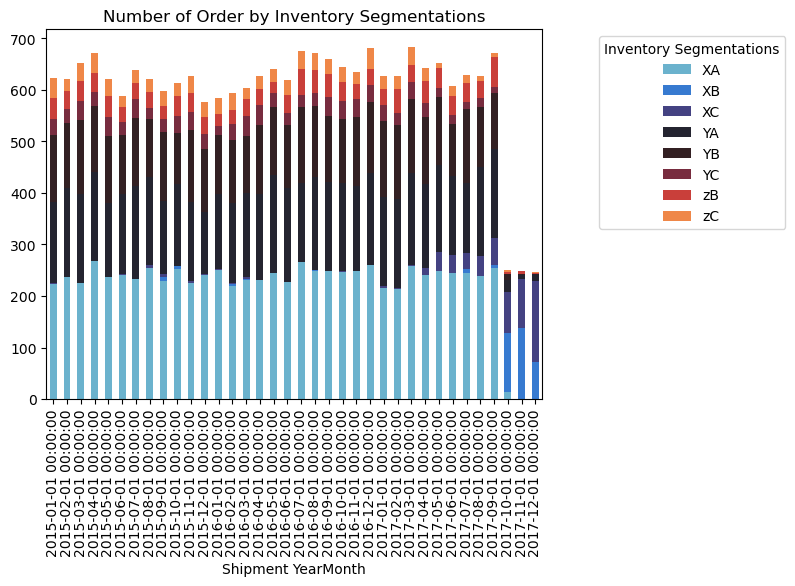

In [88]:
# Calculate total number of order for each segment
num_segment = order_segment.groupby(['Shipment YearMonth','ABCXYZ'])['Order ID'].nunique().reset_index()

# Pivot the DataFrame
num_segment = num_segment.pivot_table(index='Shipment YearMonth', columns='ABCXYZ', values='Order ID', aggfunc='first')

# Plotting
num_segment.plot(kind='bar', stacked=True, title='Number of Order by Inventory Segmentations', color = sns.color_palette('icefire', n_colors =8))
plt.legend(title = 'Inventory Segmentations', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

In [89]:
# Calculate the number of late orders and total orders per Product Department
late_segment = order_segment[order_segment['Delay Shipment'] == 'Late'].groupby('ABCXYZ').size().reset_index(name='Late Orders')
total_segment = order_segment.groupby('ABCXYZ').size().reset_index(name='Total Orders')
late_order_segment = pd.merge(late_segment, total_segment, on='ABCXYZ')

#Calculate late shipment rate by product department
late_order_segment['Late Shipment Rate'] = late_order_segment['Late Orders']/late_order_segment['Total Orders']
late_order_segment

,ABCXYZ,Late Orders,Total Orders,Late Shipment Rate
0,XA,4576,10723,0.426746
1,XB,165,360,0.458333
2,XC,267,601,0.444260
3,YA,2794,6386,0.437520
4,YB,2023,4659,0.434213
5,YC,397,952,0.417017
6,zB,535,1256,0.425955
7,zC,410,924,0.443723


In [90]:
# Calculate order quantity for each segment
quant_segment = order_segment.groupby(['Order YearMonth', 'ABCXYZ'])['Order Quantity'].sum().reset_index()
quant_segment.sort_values(by=['Order YearMonth', 'ABCXYZ'], ascending=True, inplace=True)

# Calculate warehouse inventory for each segment
inv_segment = inventory_segment.groupby(['Year Month', 'ABCXYZ'])['Warehouse Inventory'].sum().reset_index()
inv_segment.sort_values(by=['Year Month', 'ABCXYZ'], ascending=True, inplace=True)

# Convert 'Order YearMonth' and 'Year Month' to datetime format to prevent merge errors
quant_segment['Order YearMonth'] = pd.to_datetime(quant_segment['Order YearMonth'], errors='coerce')
inv_segment['Year Month'] = pd.to_datetime(inv_segment['Year Month'], errors='coerce')

# Merge based on keys 'ABCXYZ' and 'Year Month' (ensuring both are datetime)
supply_demand = pd.merge(
    quant_segment, inv_segment,
    left_on=['Order YearMonth', 'ABCXYZ'], 
    right_on=['Year Month', 'ABCXYZ']
)

# Drop duplicate 'Year Month' column after merging
supply_demand.drop(columns=['Year Month'], inplace=True)

# Display the final combined dataset
print(supply_demand)



    Order YearMonth ABCXYZ  Order Quantity  Warehouse Inventory
0        2015-01-01     XA             332                  361
1        2015-01-01     XC               2                    2
2        2015-01-01     YA             636                  418
3        2015-01-01     YB             563                  854
4        2015-01-01     YC              95                   97
..              ...    ...             ...                  ...
246      2017-12-01     XB              70                  123
247      2017-12-01     XC             149                  178
248      2017-12-01     YA               9                    2
249      2017-12-01     zB               1                    1
250      2017-12-01     zC               2                    5

[251 rows x 4 columns]


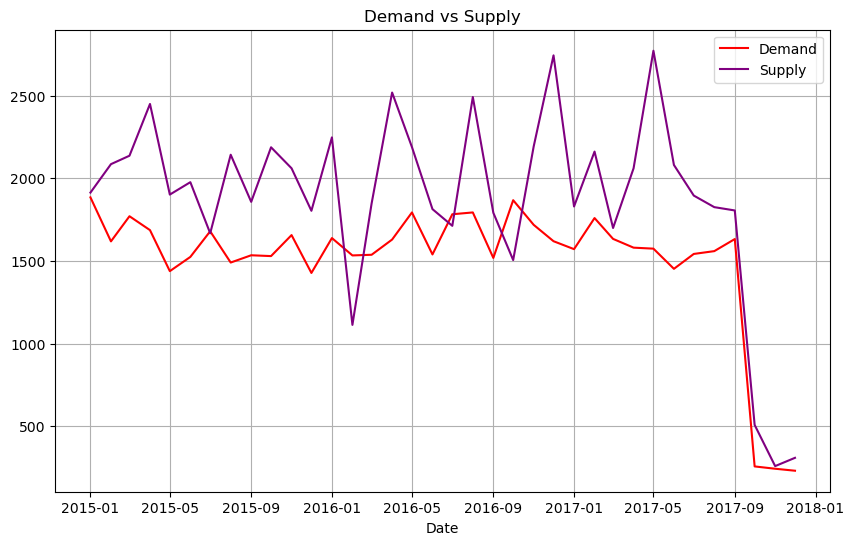

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename column for consistency (optional)
supply_demand.rename(columns={"Year Month": "Order YearMonth"}, inplace=True)

# Convert 'Year Month' to datetime
supply_demand['Order YearMonth'] = pd.to_datetime(supply_demand['Order YearMonth'], format='%Y-%m')

# Calculate total demand and supply over time
total_supply_demand = supply_demand.groupby('Order YearMonth').agg({
    'Order Quantity': 'sum',
    'Warehouse Inventory': 'sum'
})

# Plot demand vs supply
plt.figure(figsize=(10, 6))
plt.plot(total_supply_demand.index, total_supply_demand['Order Quantity'], label='Demand', color='red')
plt.plot(total_supply_demand.index, total_supply_demand['Warehouse Inventory'], label='Supply', color='purple')

plt.xlabel('Date')
plt.title('Demand vs Supply')
plt.grid(True)
plt.legend()
plt.show()



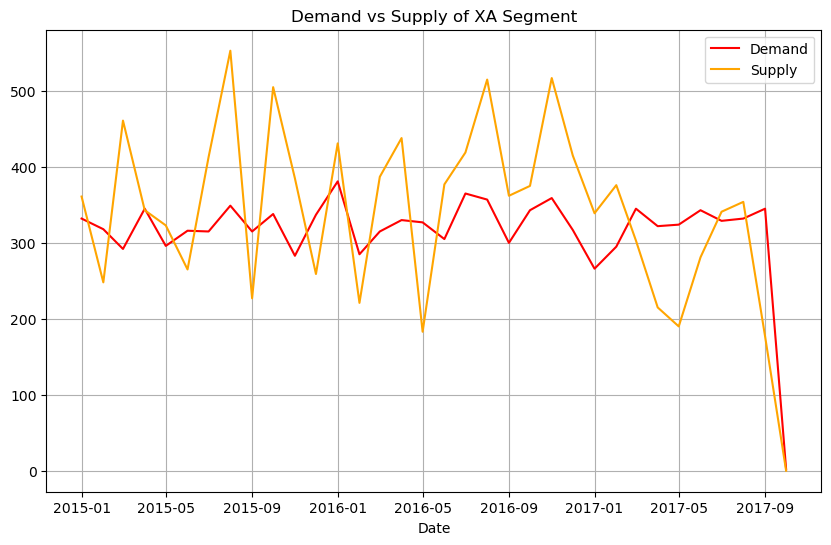

In [92]:
#Isolate order quantity and warehouse inventory for XA
xa = supply_demand[supply_demand['ABCXYZ']=='XA']

# Plotting two lines on the same chart
plt.figure(figsize=(10, 6))

plt.plot(xa['Order YearMonth'], xa['Order Quantity'], label='Demand', color='red')
plt.plot(xa['Order YearMonth'], xa['Warehouse Inventory'], label='Supply', color='orange')

plt.xlabel('Date')
plt.title('Demand vs Supply of XA Segment')
plt.grid(True)
plt.legend()
plt.show()


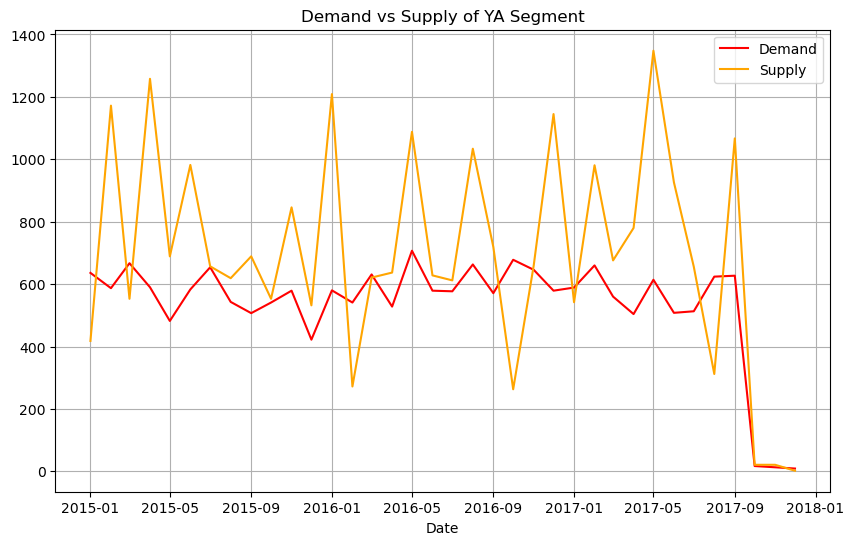

In [93]:
#Isolate order quantity and warehouse inventory for XA
ya = supply_demand[supply_demand['ABCXYZ']=='YA']

# Plotting two lines on the same chart
plt.figure(figsize=(10, 6))

plt.plot(ya['Order YearMonth'], ya['Order Quantity'], label='Demand', color='red')
plt.plot(ya['Order YearMonth'], ya['Warehouse Inventory'], label='Supply', color='orange')

plt.xlabel('Date')
plt.title('Demand vs Supply of YA Segment')
plt.grid(True)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


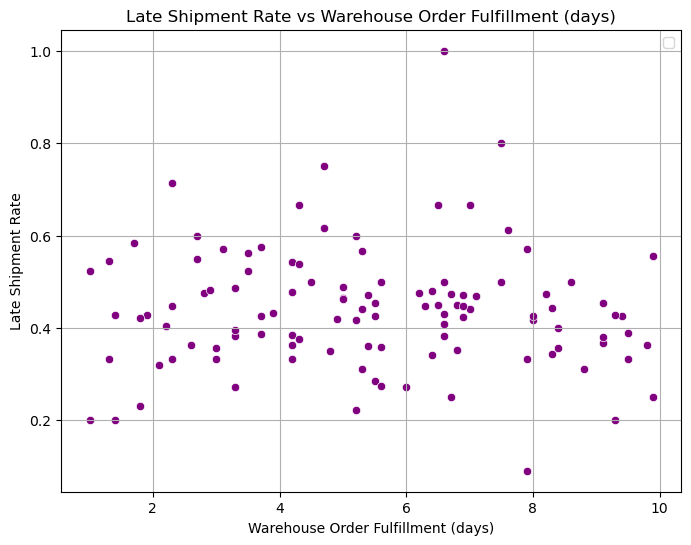

In [94]:
# Calculate the number of late orders and total orders per Product Name
late1 = orders[orders['Delay Shipment'] == 'Late'].groupby('Product Name').size().reset_index(name='Late Orders')
total1 = orders.groupby('Product Name').size().reset_index(name='Total Orders')
late_order1 = pd.merge(late1, total1, on='Product Name')

#Calculate late shipment rate by Product Name
late_order1['Late Shipment Rate'] = late_order1['Late Orders']/late_order1['Total Orders']
late_order1

#add average order fulfillment
supply_net = pd.merge(late_order1, fulfillment, on = 'Product Name')

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data = supply_net, x='Warehouse Order Fulfillment (days)', y= 'Late Shipment Rate', color='purple', marker='o')

# Add labels and title
plt.xlabel('Warehouse Order Fulfillment (days)')
plt.ylabel('Late Shipment Rate')
plt.title('Late Shipment Rate vs Warehouse Order Fulfillment (days)')
plt.grid(True)
plt.legend()
plt.show()

In [95]:
inventory

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000
...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000


In [96]:
fulfillment

,Product Name,Warehouse Order Fulfillment (days)
112,Diamondback Girls' Clarity 24 Hybrid Bike 201,1.0
39,adidas Men's Germany Black Crest Away Tee,1.0
107,Total Gym 1400,1.3
92,Mio ALPHA Heart Rate Monitor/Sport Watch,1.3
88,LIJA Women's Button Golf Dress,1.4
...,...,...
13,LIJA Women's Eyelet Sleeveless Golf Polo,9.5
48,Bridgestone e6 Straight Distance NFL Tennesse,9.5
66,Elevation Training Mask 2.0,9.8
80,Nike Kids' Grade School KD VI Basketball Shoe,9.9


In [107]:
product_segment

,Product Department,Product Category,Product Name,Net Sales,percent,Cumulative,ABC Category,CV,XYZ Category,ABCXYZ
0,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,965748.00,0.209761,0.209761,A [High value],0.077699,X [Regular demand],XA
1,Fan Shop,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,551430.00,0.119771,0.329532,A [High value],0.078438,X [Regular demand],XA
2,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,540865.20,0.117476,0.447008,A [High value],0.495370,Y [Variable demand],YA
3,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,470448.00,0.102182,0.549190,A [High value],0.078101,X [Regular demand],XA
4,Golf,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,418185.50,0.090830,0.640020,A [High value],0.476291,Y [Variable demand],YA
...,...,...,...,...,...,...,...,...,...,...
108,Fan Shop,Toys,Toys,782.76,0.000170,0.999470,C [Low value],0.080233,X [Regular demand],XC
109,Fitness,Basketball,Diamondback Boys' Insight 24 Performance Hybr,741.00,0.000161,0.999631,C [Low value],0.078086,X [Regular demand],XC
110,Outdoors,Kids' Golf Clubs,Garmin Approach S4 Golf GPS Watch,702.00,0.000152,0.999783,C [Low value],0.066617,X [Regular demand],XC
111,Outdoors,Golf Apparel,Cleveland Golf Women's 588 RTX CB Satin Chrom,579.60,0.000126,0.999909,C [Low value],0.041148,X [Regular demand],XC


In [108]:
product_segment.to_csv("product_segment.csv", index=False)
print("inventory table saved as 'product_segment.csv'")


inventory table saved as 'product_segment.csv'
